In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('/Users/adityadhanrajsingh/Desktop/Minor2_project/train1.csv')
df_test=pd.read_csv('/Users/adityadhanrajsingh/Desktop/Minor2_project/test1.csv')

In [3]:
print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


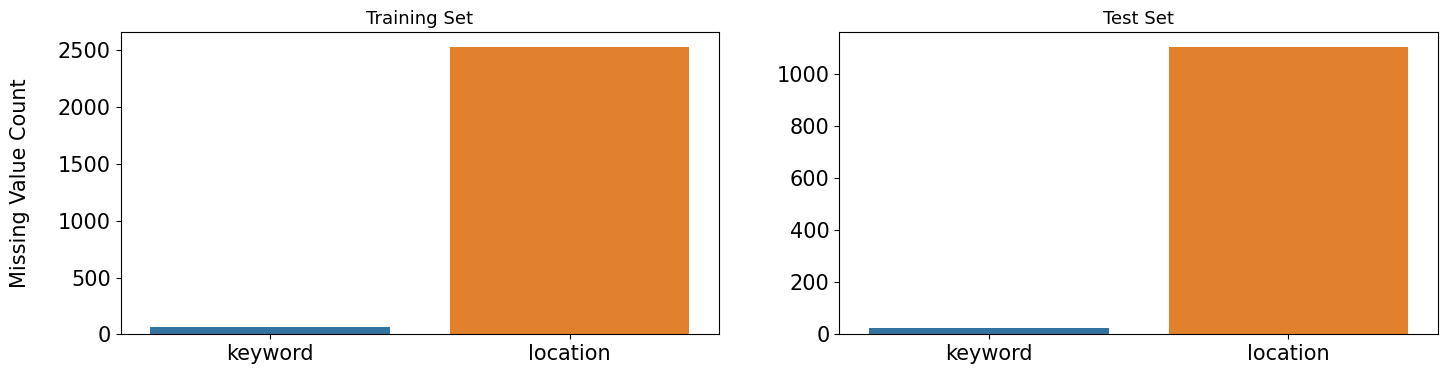

In [4]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [df_train, df_test]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [5]:
print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training) - {df_test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {df_train["location"].nunique()} (Training) - {df_test["location"].nunique()} (Test)')

Number of unique values in keyword = 222 (Training) - 222 (Test)
Number of unique values in location = 3342 (Training) - 1603 (Test)


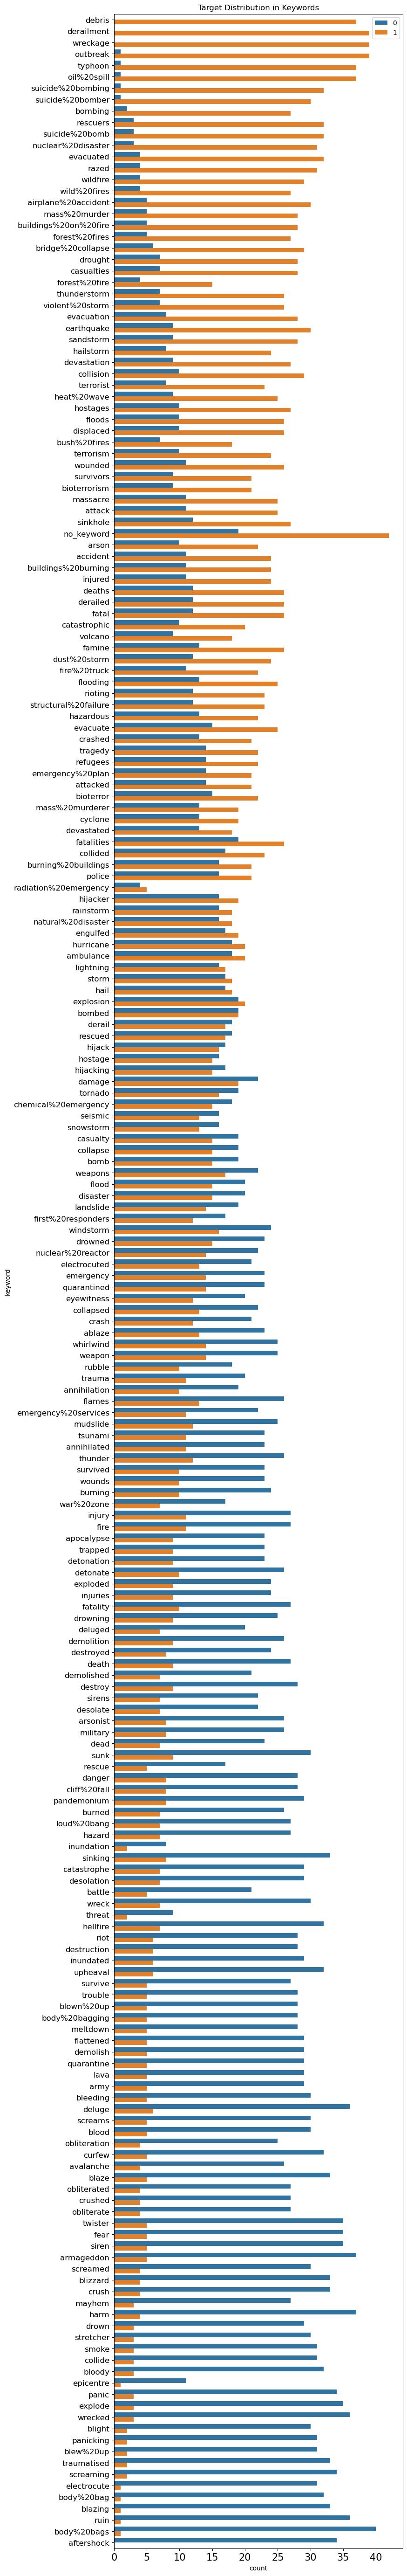

In [6]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)


In [7]:
df_train

,id,keyword,location,text,target
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1
7609,10870,no_keyword,no_location,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1


In [8]:
df_test

,id,keyword,location,text
0,0,no_keyword,no_location,Just happened a terrible car crash
1,2,no_keyword,no_location,"Heard about #earthquake is different cities, s..."
2,3,no_keyword,no_location,"there is a forest fire at spot pond, geese are..."
3,9,no_keyword,no_location,Apocalypse lighting. #Spokane #wildfires
4,11,no_keyword,no_location,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...
3260,10868,no_keyword,no_location,Green Line derailment in Chicago http://t.co/U...
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
from nltk.corpus import stopwords
STOPWORDS=stopwords.words('english')

In [31]:
import numpy as np
import string
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [32]:
#clean the text
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#removes @mentions
    text=re.sub(r'#','',text)#removing the '#' symbol
    text=re.sub(r'RT[\s]+', '',text)#Removing RT
    text=re.sub(r'https?:\/\/\S+','',text)#remove the hyper link
    return text
#cleaning the text
df_train['text']=df_train['text'].apply(cleanTxt)

#show the clean text
df_train

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity,punctuation_count,hashtag_count,mention_count
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,0,4.307692,68,0.000000,0.000000,0,0,0
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,0.400000,0.100000,1,0,0
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,0.387500,-0.018750,3,0,0
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1,8,8,1,0,7.000000,64,0.000000,0.000000,1,0,0
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1,16,15,7,0,4.375000,86,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1,10,10,2,0,5.100000,61,1.000000,0.000000,0,0,0
7609,10870,no_keyword,no_location,_ahrary The out of control wild fires in Cali...,1,19,16,9,0,4.684211,108,0.350000,0.150000,3,0,0
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1,7,7,2,0,5.142857,43,0.000000,0.000000,6,0,0
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1,19,19,5,0,6.263158,137,0.583333,-0.260417,5,0,0


In [33]:
#clean the text
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)#removes @mentions
    text=re.sub(r'#','',text)#removing the '#' symbol
    text=re.sub(r'RT[\s]+', '',text)#Removing RT
    text=re.sub(r'https?:\/\/\S+','',text)#remove the hyper link
    return text
#cleaning the text
df_test['text']=df_test['text'].apply(cleanTxt)

#show the clean text
df_test

,id,keyword,location,text,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,0,no_keyword,no_location,Just happened a terrible car crash,6,6,2,0,4.833333,34,0,0,0
1,2,no_keyword,no_location,"Heard about earthquake is different cities, st...",9,9,2,0,6.111111,63,2,0,0
2,3,no_keyword,no_location,"there is a forest fire at spot pond, geese are...",19,19,9,0,4.105263,96,2,0,0
3,9,no_keyword,no_location,Apocalypse lighting. Spokane wildfires,4,4,0,0,8.750000,38,1,0,0
4,11,no_keyword,no_location,Typhoon Soudelor kills 28 in China and Taiwan,8,8,2,0,4.750000,45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,8,7,0,0,6.000000,55,0,0,0
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...,23,22,6,0,5.086957,139,5,0,0
3260,10868,no_keyword,no_location,Green Line derailment in Chicago,5,5,1,0,5.600000,33,0,0,0
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO),6,6,0,0,6.166667,43,2,0,0


In [34]:
from textblob import TextBlob
#create a function to get the subjectivity and polarity
def getSubjectiviy(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df_train['Subjectivity']=df_train['text'].apply(getSubjectiviy)
df_train['Polarity']=df_train['text'].apply(getPolarity)

#Show
df_train

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity,punctuation_count,hashtag_count,mention_count
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,0,4.307692,68,0.000000,0.000000,0,0,0
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,0.400000,0.100000,1,0,0
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,0.387500,-0.018750,3,0,0
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1,8,8,1,0,7.000000,64,0.000000,0.000000,1,0,0
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1,16,15,7,0,4.375000,86,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,no_keyword,no_location,Two giant cranes holding a bridge collapse int...,1,10,10,2,0,5.100000,61,1.000000,0.000000,0,0,0
7609,10870,no_keyword,no_location,_ahrary The out of control wild fires in Cali...,1,19,16,9,0,4.684211,108,0.350000,0.150000,3,0,0
7610,10871,no_keyword,no_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1,7,7,2,0,5.142857,43,0.000000,0.000000,6,0,0
7611,10872,no_keyword,no_location,Police investigating after an e-bike collided ...,1,19,19,5,0,6.263158,137,0.583333,-0.260417,5,0,0


In [15]:
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stemmer = SnowballStemmer('english')
raw_df =  pd.concat([df_train, df_test])

In [16]:
raw_df

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1.0,13,13,6,0,4.384615,69,0.0000,0.00000
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1.0,7,7,0,0,4.571429,38,0.4000,0.10000
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1.0,22,20,11,0,5.090909,133,0.3875,-0.01875
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1.0,8,8,1,0,7.125000,65,0.0000,0.00000
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1.0,16,15,7,0,4.500000,88,0.0000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,8,7,0,0,6.000000,55,NaN,NaN
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...,NaN,23,22,6,0,5.086957,139,NaN,NaN
3260,10868,no_keyword,no_location,Green Line derailment in Chicago,NaN,6,6,1,1,8.333333,55,NaN,NaN
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO),NaN,7,7,0,1,8.428571,65,NaN,NaN


In [17]:
import re
def clean_text(each_text):

    
    # remove numbers from text
    text_no_num = re.sub(r'\d+', '', each_text_no_url)

    # tokenize each text
    word_tokens = word_tokenize(text_no_num)
    
    # remove sptial character
    clean_text = []
    for word in word_tokens:
        clean_text.append("".join([e for e in word if e.isalnum()]))

    # remove stop words and lower
    text_with_no_stop_word = [w.lower() for w in clean_text if not w in stop_words]  

    # do stemming
    stemmed_text = [stemmer.stem(w) for w in text_with_no_stop_word]
    
    return " ".join(" ".join(stemmed_text).split())
raw_df['text']=raw_df['text'].apply(cleanTxt)

In [18]:
raw_df

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1.0,13,13,6,0,4.384615,69,0.0000,0.00000
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1.0,7,7,0,0,4.571429,38,0.4000,0.10000
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1.0,22,20,11,0,5.090909,133,0.3875,-0.01875
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1.0,8,8,1,0,7.125000,65,0.0000,0.00000
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1.0,16,15,7,0,4.500000,88,0.0000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,8,7,0,0,6.000000,55,NaN,NaN
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...,NaN,23,22,6,0,5.086957,139,NaN,NaN
3260,10868,no_keyword,no_location,Green Line derailment in Chicago,NaN,6,6,1,1,8.333333,55,NaN,NaN
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO),NaN,7,7,0,1,8.428571,65,NaN,NaN


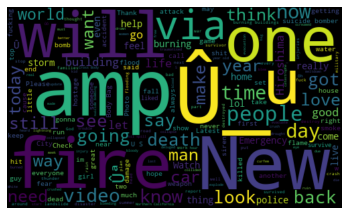

In [19]:
from wordcloud import WordCloud
allwords=' '.join([ twts for twts in raw_df['text']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
def getAnalysis(score):
    if score>0:
        return "Natural Disaster"
    else:
        return ""
raw_df['Analysis']=raw_df['target'].apply(getAnalysis)
raw_df

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity,Analysis
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1.0,13,13,6,0,4.384615,69,0.0000,0.00000,Natural Disaster
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1.0,7,7,0,0,4.571429,38,0.4000,0.10000,Natural Disaster
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1.0,22,20,11,0,5.090909,133,0.3875,-0.01875,Natural Disaster
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1.0,8,8,1,0,7.125000,65,0.0000,0.00000,Natural Disaster
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1.0,16,15,7,0,4.500000,88,0.0000,0.00000,Natural Disaster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,8,7,0,0,6.000000,55,NaN,NaN,
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...,NaN,23,22,6,0,5.086957,139,NaN,NaN,
3260,10868,no_keyword,no_location,Green Line derailment in Chicago,NaN,6,6,1,1,8.333333,55,NaN,NaN,
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO),NaN,7,7,0,1,8.428571,65,NaN,NaN,


In [21]:
def getAnalysis(score):
    if score=='Natural Disaster':
        return 1
    else:
        return 0
raw_df['Target']=raw_df['Analysis'].apply(getAnalysis)
raw_df

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,Subjectivity,Polarity,Analysis,Target
0,1,no_keyword,no_location,Our Deeds are the Reason of this earthquake Ma...,1.0,13,13,6,0,4.384615,69,0.0000,0.00000,Natural Disaster,1
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1.0,7,7,0,0,4.571429,38,0.4000,0.10000,Natural Disaster,1
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1.0,22,20,11,0,5.090909,133,0.3875,-0.01875,Natural Disaster,1
3,6,no_keyword,no_location,"13,000 people receive wildfires evacuation ord...",1.0,8,8,1,0,7.125000,65,0.0000,0.00000,Natural Disaster,1
4,7,no_keyword,no_location,Just got sent this photo from Ruby Alaska as s...,1.0,16,15,7,0,4.500000,88,0.0000,0.00000,Natural Disaster,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,no_keyword,no_location,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,8,7,0,0,6.000000,55,NaN,NaN,,0
3259,10865,no_keyword,no_location,Storm in RI worse than last hurricane. My city...,NaN,23,22,6,0,5.086957,139,NaN,NaN,,0
3260,10868,no_keyword,no_location,Green Line derailment in Chicago,NaN,6,6,1,1,8.333333,55,NaN,NaN,,0
3261,10874,no_keyword,no_location,MEG issues Hazardous Weather Outlook (HWO),NaN,7,7,0,1,8.428571,65,NaN,NaN,,0


In [22]:
raw_df.columns
datatypes = raw_df.dtypes
datatypes

id                     int64
keyword               object
location              object
text                  object
target               float64
word_count             int64
unique_word_count      int64
stop_word_count        int64
url_count              int64
mean_word_length     float64
char_count             int64
Subjectivity         float64
Polarity             float64
Analysis              object
Target                 int64
dtype: object

In [23]:
feature = 'text'
label = 'Target'
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# split train and test
X_train, X_test,y_train, y_test = model_selection.train_test_split(raw_df['text'],
                                                                   raw_df['Target'],
                                                                   test_size=0.3, random_state=0, 
                                                                   shuffle=True)

In [24]:
X_train_GBC = X_train.values.reshape(-1)
x_test_GBC = X_test.values.reshape(-1)
# Vectorize text
vectorizer = CountVectorizer()
X_train_GBC = vectorizer.fit_transform(X_train_GBC)
x_test_GBC = vectorizer.transform(x_test_GBC)
# Train the model
model = ensemble.GradientBoostingClassifier(learning_rate=0.1,                                            
                                            n_estimators=2000,
                                            max_depth=9,
                                            min_samples_split=6,
                                            min_samples_leaf=2,
                                            max_features=8,
                                            subsample=0.9)
model.fit(X_train_GBC, y_train)

GradientBoostingClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                           min_samples_split=6, n_estimators=2000,
                           subsample=0.9)

In [25]:
# Evaluate the model
predicted_prob = model.predict_proba(x_test_GBC)[:,1]
predicted = model.predict(x_test_GBC)

accuracy = metrics.accuracy_score(predicted, y_test)
print("Test accuracy: ", accuracy)
print(metrics.classification_report(y_test, predicted, target_names=["0", "1"]))
print("Test F-scoare: ", metrics.f1_score(y_test, predicted))


Test accuracy:  0.7502298498314435
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      2271
           1       0.63      0.42      0.51       992

    accuracy                           0.75      3263
   macro avg       0.71      0.66      0.67      3263
weighted avg       0.74      0.75      0.73      3263

Test F-scoare:  0.5075528700906345


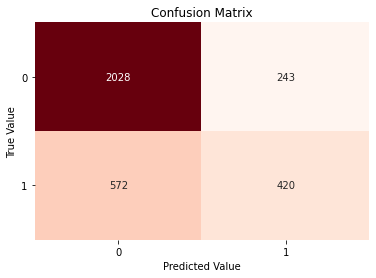

In [26]:
import seaborn as sns
conf_matrix = metrics.confusion_matrix(y_test, predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)

plt.show()

In [27]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
X_train, X_test,y_train, y_test = model_selection.train_test_split(raw_df['text'],
                                                                   raw_df['Target'],
                                                                   test_size=0.3, random_state=0, 
                                                                   shuffle=True)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# fit SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# evaluate model on test set
preds = clf.predict(X_test)
y2_pred = clf.predict(X_test)
accuracy_score(y_test, y2_pred)


0.7563591786699356

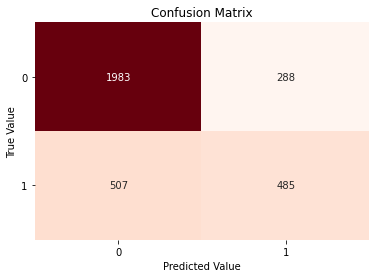

In [28]:
import seaborn as sns
conf_matrix = metrics.confusion_matrix(y_test, y2_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

In [29]:
accuracy = metrics.accuracy_score(y2_pred, y_test)
print("Test accuracy: ", accuracy)
print(metrics.classification_report(y_test, y2_pred, target_names=["0", "1"]))
print("Test F-scoare: ", metrics.f1_score(y_test, y2_pred))


Test accuracy:  0.7563591786699356
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2271
           1       0.63      0.49      0.55       992

    accuracy                           0.76      3263
   macro avg       0.71      0.68      0.69      3263
weighted avg       0.75      0.76      0.75      3263

Test F-scoare:  0.5495750708215297
